In [3]:
#Run this first

import numpy as np
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

In [4]:
#Data from linear_data_v1.csv file.
data = ascii.read("linear_data_v1.csv")
print(data)

        x               noisy_y             y_error      
------------------ ------------------ -------------------
               0.0 1.7360509309286671  1.6042382156957993
0.3448275862068966  3.661686702075544  1.9425413624122052
0.6896551724137931   1.18057784261486  1.0617529171843838
1.0344827586206897  2.610231712463395 0.31294443360596336
1.3793103448275863  5.959862116812046  1.5883293503598452
1.7241379310344829 4.1941453450668895   2.177753175667884
2.0689655172413794  5.817846322419468  0.5090621195447468
 2.413793103448276   4.36012846802356  1.1434687271480668
2.7586206896551726  6.614945026338582  0.9203573613801007
3.1034482758620694   8.40938073782375  1.6406399247378505
               ...                ...                 ...
6.8965517241379315 14.144107931240505 0.38787329691405426
 7.241379310344828  14.17439339221375  0.9190733501546212
 7.586206896551724 10.044923709321903   2.611328077974711
 7.931034482758621 17.430864750866952  0.5967989843234848
 8.27586206896

slope = 1.97
intercept = 1.45


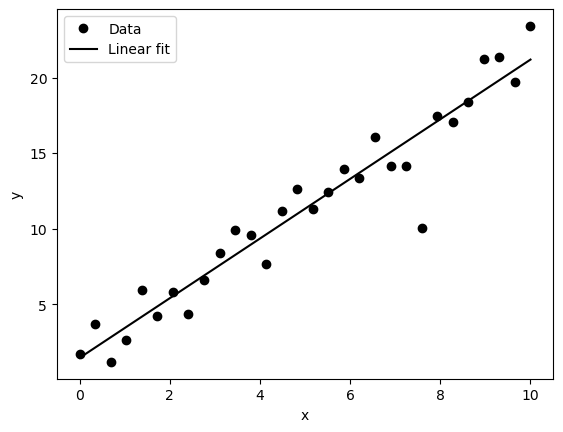

In [25]:
#x = x values, y = noisy_y values, yerror = y_error values
x = np.array(data['x'])
y = np.array(data['noisy_y'])
yerror = np.array(data['y_error'])

#Fitting by astropy.modeling
#fit a line to the (x, y) values
#initialize linear fitter - creates class 
fitter = fitting.LinearLSQFitter()
#initialize linear model
initline = models.Linear1D()
#fitting a line to the data
linearfit = fitter(initline, x, y)

#plot by matplotlib.pyplot
#x = x, y = noisy_y. Ignores y_error
fig, linfit = plt.subplots()
linfit.plot(x,y, 'ko', label='Data')
linfit.plot(x,linearfit(x), 'k-', label='Linear fit')
linfit.set(xlabel = 'x', ylabel = 'y')
linfit.legend()

#print fit parameters.  
#From Greg: using the slope.value allows you to access the model parameters from the fit.  
#In the formatted print statement the '3.2f' means that you should print the value with 3 digits,
#2 of which are after the decimal.  Google "python print format statements" for more info.
print(f'slope = {linearfit.slope.value:3.2f}')
print(f'intercept = {linearfit.intercept.value:3.2f}')

slope = 2.00
intercept = 0.65


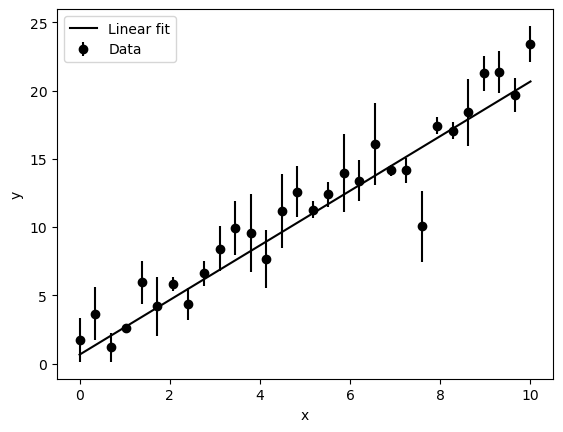

In [31]:
#Linear fit, weighted for uncertainty of y
weightedlinearfit = fitter(initline, x, y, weights= 1.0/(yerror**2))

#plot by matplotlib.pyplot
#x = x, y = noisy_y, error = y_error 
fig, linfit = plt.subplots()
linfit.plot(x,weightedlinearfit(x), 'k-', label='Linear fit')
linfit.errorbar(x,y, yerr = yerror, fmt = 'ko', label='Data')
linfit.set(xlabel = 'x', ylabel = 'y')
linfit.legend()

#prints slope and y-int of the weighted linear fit to the 2nd decimal place.
print(f'slope = {weightedlinearfit.slope.value:3.2f}')
print(f'intercept = {weightedlinearfit.intercept.value:3.2f}')

In [37]:
#Line plotting function
#In: numpy arrays x, y, dy
#Out: plot; "The idea is that you execute the cell with this function and in a subsequent cell you then only need to run the function to do the plotting."
#Uses uncertainties.
#Needs these imports:
    #import numpy as np
    #import matplotlib.pyplot as plt
    #from astropy.modeling import models, fitting
def fitline(x,y,dy):
    #Class 
    Fitter = fitting.LinearLSQFitter()
    initLine = models.Linear1D()
    #Object
    #Linear fit, weighted for uncertainty dy
    weightedLinearFit = Fitter(initLine, x,y, weights = 1.0/(dy**2))
    #Plots linear fit using matplotlib
    #Black dots are data, black line is the linear fit.
    plt.plot(x,weightedLinearFit(x), 'k-', label='Linear Fit')
    plt.errorbar(x, y, yerr = dy, fmt = 'ko', label = 'Data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    print(f'slope = {weightedLinearFit.slope.value:3.2f}')
    print(f'intercept = {weightedLinearFit.intercept.value:3.2f}')

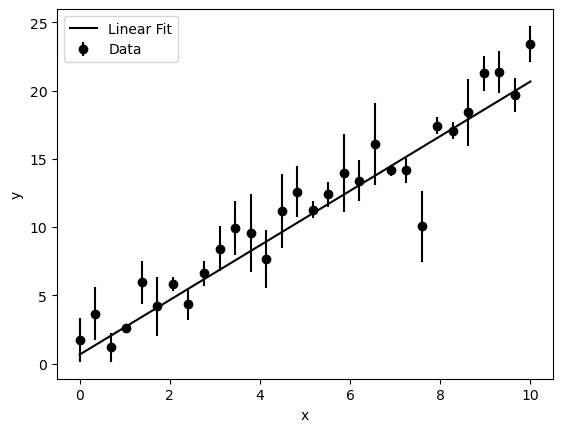

slope = 2.00
intercept = 0.65


In [38]:
#Running the function
fitline(np.array(data['x']), np.array(data['noisy_y']), np.array(data['y_error']))